<a href="https://colab.research.google.com/github/UTEDungNguyen/Artificial-Intelligent/blob/main/Predict_Future_Based_On_Face_Shape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  

In [ ]:
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_data = train.flow_from_directory('/content/drive/MyDrive/Face_Shape_Future_Predict/Face_Shape_Predict_Future/FaceShape Dataset/training_set', target_size=(200,200), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/Face_Shape_Future_Predict/Face_Shape_Predict_Future/FaceShape Dataset/testing_set', target_size=(200,200), class_mode='categorical')
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

Found 3936 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
train_index : {'Heart': 0, 'Oblong': 1, 'Oval': 2, 'Round': 3, 'Square': 4}
test_index: {'Heart': 0, 'Oblong': 1, 'Oval': 2, 'Round': 3, 'Square': 4}


In [ ]:
model= Sequential()
#CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(200,200,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=128
epochs =30
classes =5

In [ ]:
# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [ ]:
his=model.fit(train_data,epochs=30,batch_size=128,verbose=1,validation_data=test_data)
eva=model.evaluate(train_data,verbose=0)
print('Train Loss', eva[0])
print('Train Accuracy', eva[1])

Epoch 1/30
123/123 [==============================] - 838s 7s/step - loss: 1.6212 - accuracy: 0.2340 - val_loss: 1.5640 - val_accuracy: 0.2790
Epoch 2/30
123/123 [==============================] - 67s 550ms/step - loss: 1.5264 - accuracy: 0.3295 - val_loss: 1.5107 - val_accuracy: 0.3430
Epoch 3/30
123/123 [==============================] - 67s 545ms/step - loss: 1.4056 - accuracy: 0.4106 - val_loss: 1.5046 - val_accuracy: 0.3310
Epoch 4/30
123/123 [==============================] - 73s 591ms/step - loss: 1.1363 - accuracy: 0.5513 - val_loss: 1.5261 - val_accuracy: 0.3490
Epoch 5/30
123/123 [==============================] - 67s 547ms/step - loss: 0.6884 - accuracy: 0.7464 - val_loss: 1.7109 - val_accuracy: 0.3650
Epoch 6/30
123/123 [==============================] - 67s 547ms/step - loss: 0.2821 - accuracy: 0.9055 - val_loss: 2.4709 - val_accuracy: 0.4000
Epoch 7/30
123/123 [==============================] - 73s 592ms/step - loss: 0.1628 - accuracy: 0.9439 - val_loss: 2.6167 - val_accu

In [ ]:
model.save('/content/drive/MyDrive/Model save/Face_Shape.h5')

<ipython-input-11-bd6aee40bd19>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='orange')


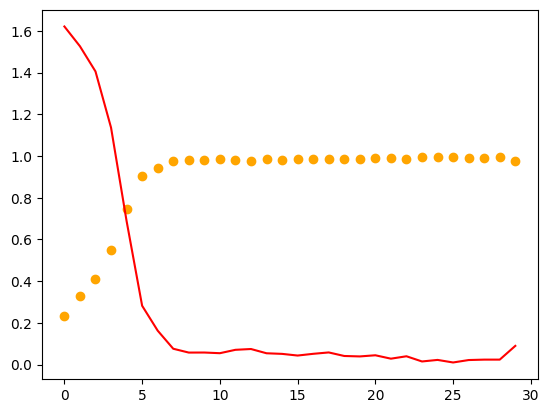

In [ ]:
accuracy = his.history['accuracy']
loss = his.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='orange')
plt.plot(epochs,loss , 'r', label ='Training loss')
plt.show()

In [1]:
from keras.models import load_model
# load model save
model_face_shapes= load_model('/content/drive/MyDrive/Model save/Face_Shape.h5')

1/1 [==============================] - 0s 21ms/step
Tướng mặt này là : Heart 
Nam giới, nữ giới mang tướng mặt này đều có khả năng tư duy logic, thông minh và đầu óc nghệ thuật tương đối cao.
Ở họ có sự sáng tạo, trực giác tốt, có tấm lòng yêu thương người khác.
Người mang tướng mặt này sống hướng ngoại, biết tận hưởng cuộc sống và luôn lạc quan vui vẻ.
Trong họ luôn mạnh mẽ và tràn đầy năng lượng.
Họ có sự hấp dẫn và quyến rũ, biết cách điều khiển mọi thứ theo cách của riêng mình.



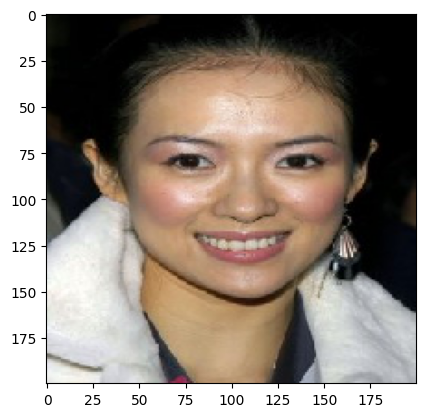

1/1 [==============================] - 0s 18ms/step
Tướng mặt này là : Oblong 
Người mặt dài tâm tính lương thiện, hay giúp đỡ người khác, thích làm việc thiện mà không chút toan tính nào.
Lạc quan, nhìn nhận vấn đề theo chiều hướng tích cực, luôn luôn phấn đấu để đạt được những mục tiêu trong cuộc sống.
Thường có tài ngoại giao, rất khéo léo trong ăn nói, gặp người lạ họ dễ dàng bắt chuyện làm quen.
Tính cách ôn hòa, khiêm tốn, lịch sự, dễ dàng thích ứng với bất cứ môi trường nào.
Nhiệt tình trong công việc, luôn suy nghĩ vô cùng chu đáo nên sẽ đạt được thành tích tốt.



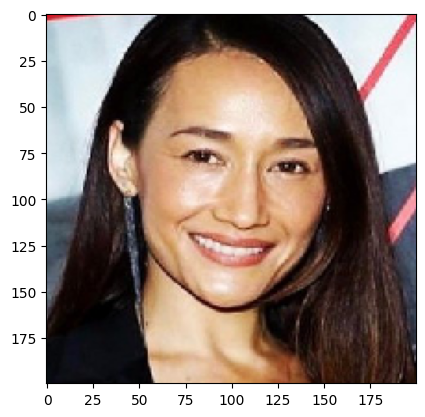

1/1 [==============================] - 0s 34ms/step
Tướng mặt này là : Oval 
Những người có tướng mặt trái xoan tính thuận chiều, tính cách ôn hòa, dễ mến, khéo léo, sắc sảo trong giao tiếp.
Thích ứng rất tốt, giỏi quan hệ với mọi người và rất có lý tính, được nhiều người thương yêu, quý trọng và giúp đỡ.
Họ không bao giờ tỏ ra hốt hoảng trong lúc rối loạn mà rất bình tĩnh và có phán xét đúng đắn thích hợp.
Tâm tính họ tương đối ổn định, được mọi người tin cậy.
Nhưng do bản chất là người quá nhạy cảm nên đôi khi vì chuyện rất nhỏ cũng phải suy nghĩ.



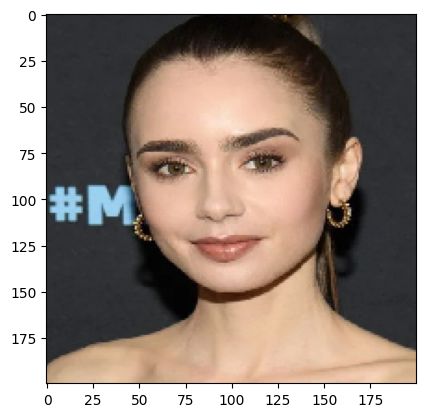

1/1 [==============================] - 0s 27ms/step
Tướng mặt này là : Round 
Người có tướng này là người có năng lực về tổ chức, nên thường được chọn là người đứng đầu các tổ chức hoạt động.
Tính cách người mặt tròn khá vui tính, luôn vui vẻ, sẵn lòng giúp đỡ người khác.
sống rất thân thiện hòa nhập với mọi người vì thế mà được mọi người vô cùng yêu mến.
Trong những trường hợp gặp phải điều gì trái ý, va chạm, hoặc khác với ý kiến mình định sẵn, thường không hay để bụng, khó chịu.



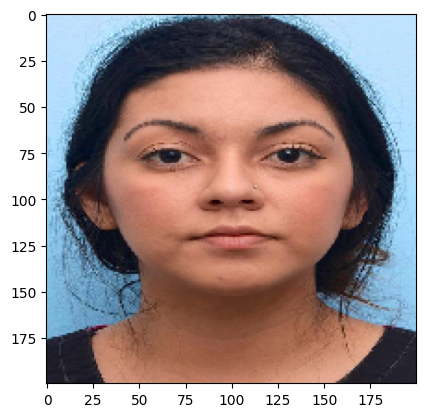

1/1 [==============================] - 0s 39ms/step
Tướng mặt này là : Square
Người có tướng mặt vuông là người thông minh nhạy bén, có đầu óc logic cao, có sự quyết đoán và mạnh mẽ trong mọi chuyện.
Họ có tài lãnh đạo và có khả năng thuyết phục người khác rất lớn.
Người có tướng mặt vuông đáng tin cậy, tính cách trầm tĩnh, kiên định, kiên trì tới mục tiêu tới cùng.
Những người có tướng mặt vuông thích sự đơn độc, thích cuộc sống mạo hiểm. Họ không thích lý thuyết suông, sống khá thực tế.



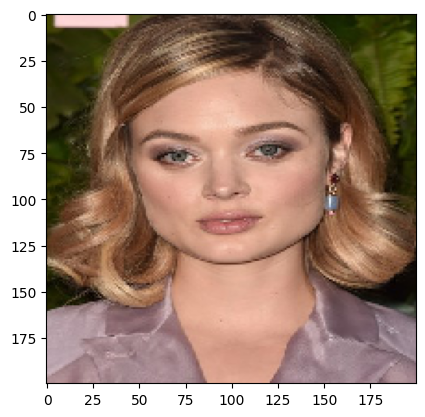

1/1 [==============================] - 0s 26ms/step
Tướng mặt này là : Oblong 
Người mặt dài tâm tính lương thiện, hay giúp đỡ người khác, thích làm việc thiện mà không chút toan tính nào.
Lạc quan, nhìn nhận vấn đề theo chiều hướng tích cực, luôn luôn phấn đấu để đạt được những mục tiêu trong cuộc sống.
Thường có tài ngoại giao, rất khéo léo trong ăn nói, gặp người lạ họ dễ dàng bắt chuyện làm quen.
Tính cách ôn hòa, khiêm tốn, lịch sự, dễ dàng thích ứng với bất cứ môi trường nào.
Nhiệt tình trong công việc, luôn suy nghĩ vô cùng chu đáo nên sẽ đạt được thành tích tốt.



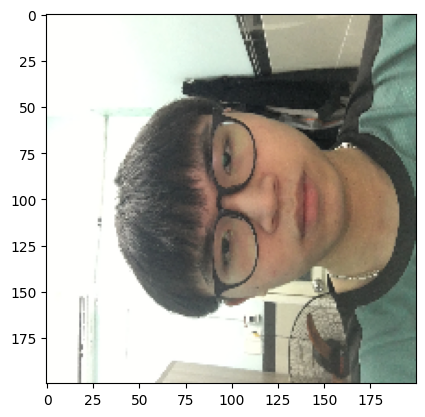

1/1 [==============================] - 0s 28ms/step
Tướng mặt này là : Oblong 
Người mặt dài tâm tính lương thiện, hay giúp đỡ người khác, thích làm việc thiện mà không chút toan tính nào.
Lạc quan, nhìn nhận vấn đề theo chiều hướng tích cực, luôn luôn phấn đấu để đạt được những mục tiêu trong cuộc sống.
Thường có tài ngoại giao, rất khéo léo trong ăn nói, gặp người lạ họ dễ dàng bắt chuyện làm quen.
Tính cách ôn hòa, khiêm tốn, lịch sự, dễ dàng thích ứng với bất cứ môi trường nào.
Nhiệt tình trong công việc, luôn suy nghĩ vô cùng chu đáo nên sẽ đạt được thành tích tốt.



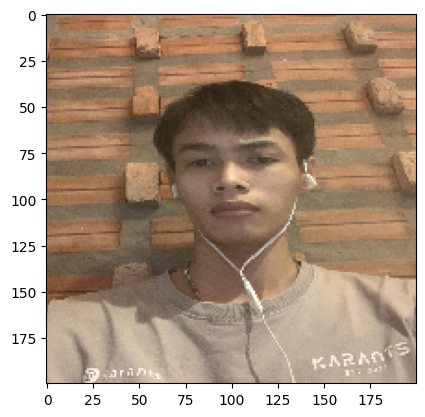

In [11]:
# Đường dẫn thư mục test
test="/content/drive/MyDrive/Face_Shape_Future_Predict/Face_Shape_Predict_Future/FaceShape Dataset/Identify_test"

# Tạo tên hiện của các loại hoa
name_face_shape= ['Heart \nNam giới, nữ giới mang tướng mặt này đều có khả năng tư duy logic, thông minh và đầu óc nghệ thuật tương đối cao.\nỞ họ có sự sáng tạo, trực giác tốt, có tấm lòng yêu thương người khác.\nNgười mang tướng mặt này sống hướng ngoại, biết tận hưởng cuộc sống và luôn lạc quan vui vẻ.\nTrong họ luôn mạnh mẽ và tràn đầy năng lượng.\nHọ có sự hấp dẫn và quyến rũ, biết cách điều khiển mọi thứ theo cách của riêng mình.\n',
'Oblong \nNgười mặt dài tâm tính lương thiện, hay giúp đỡ người khác, thích làm việc thiện mà không chút toan tính nào.\nLạc quan, nhìn nhận vấn đề theo chiều hướng tích cực, luôn luôn phấn đấu để đạt được những mục tiêu trong cuộc sống.\nThường có tài ngoại giao, rất khéo léo trong ăn nói, gặp người lạ họ dễ dàng bắt chuyện làm quen.\nTính cách ôn hòa, khiêm tốn, lịch sự, dễ dàng thích ứng với bất cứ môi trường nào.\nNhiệt tình trong công việc, luôn suy nghĩ vô cùng chu đáo nên sẽ đạt được thành tích tốt.\n',
'Oval \nNhững người có tướng mặt trái xoan tính thuận chiều, tính cách ôn hòa, dễ mến, khéo léo, sắc sảo trong giao tiếp.\nThích ứng rất tốt, giỏi quan hệ với mọi người và rất có lý tính, được nhiều người thương yêu, quý trọng và giúp đỡ.\nHọ không bao giờ tỏ ra hốt hoảng trong lúc rối loạn mà rất bình tĩnh và có phán xét đúng đắn thích hợp.\nTâm tính họ tương đối ổn định, được mọi người tin cậy.\nNhưng do bản chất là người quá nhạy cảm nên đôi khi vì chuyện rất nhỏ cũng phải suy nghĩ.\n',
'Round \nNgười có tướng này là người có năng lực về tổ chức, nên thường được chọn là người đứng đầu các tổ chức hoạt động.\nTính cách người mặt tròn khá vui tính, luôn vui vẻ, sẵn lòng giúp đỡ người khác.\nsống rất thân thiện hòa nhập với mọi người vì thế mà được mọi người vô cùng yêu mến.\nTrong những trường hợp gặp phải điều gì trái ý, va chạm, hoặc khác với ý kiến mình định sẵn, thường không hay để bụng, khó chịu.\n',
'Square\nNgười có tướng mặt vuông là người thông minh nhạy bén, có đầu óc logic cao, có sự quyết đoán và mạnh mẽ trong mọi chuyện.\nHọ có tài lãnh đạo và có khả năng thuyết phục người khác rất lớn.\nNgười có tướng mặt vuông đáng tin cậy, tính cách trầm tĩnh, kiên định, kiên trì tới mục tiêu tới cùng.\nNhững người có tướng mặt vuông thích sự đơn độc, thích cuộc sống mạo hiểm. Họ không thích lý thuyết suông, sống khá thực tế.\n']

# Quét hết các hình trong đường dẫn và tiến hành dự đoán các loại tiền
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(200,200), color_mode = 'rgb')
  plt.imshow(img)

  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_face_shapes.predict(img).argmax())

  print("Tướng mặt này là :",name_face_shape[result])
  plt.show()